# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** 
In the simulation, the agent doesn't move and sits idle at a random intersection no matter what. The agent occasionally receives rewards when sitting idle is the correct action, usually ranging from 1.5-3 points for optimal actions and 0-1 points for safe actions that are suboptimal. An example of a reward is when the light is red, the waypoint is not right and the agent idles and receives 1.5-3 points for an optimal action. An example of a suboptimal action is in the similar case when the light is red, the waypoing is right, and the agent idles and receives 0-1 points. This is legal, because technically waiting is allowed; however, it's better to go right. Since the agent can only idle, it's only capable of causing minor traffic violations. These penalties usually range between -4 and -6.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** The agent.py file contains mostly unimplemented class methods and TODO comments, which makes sense, since I will need to implement the AI for this project. However, the run function, which sets up the simulation, has a number of flags which can be set. Most of these flags are extremely important. For example, num_dummies sets the number of agents in the environment. This is important, because if the world were empty, the learning algorithm could be approached differently; it could be treated as a Markov Decision Process (MDP) for example. Another is the alpha flag for the learning rate. This is also extremely important, because in a deterministic world, we could set it to 1 and only consider the current state. However, if the the other agents do not always act according to plan (i.e., are stochastic, because they act randomly sometimes and don't perform the best action), then we would have to tweak this value to something greater than 0, because 0 would mean it wouldn't learn at all and would thus not be a very 'smart' cab. A third flag would be the epsilon flag, which sets the exploration factor for the agent. Since by default this is set to 1, we can expect the car to take completely random actions, where as with 0 it takes no random actions. This could allow me to take a simulated-annealing-type approach to Q-learning.

The environment.py file is fully implemented and contains logic for how the environment behaves, which includes the traffic lights, dummy agents, a base class for agent that we override in the aforementioned agent.py file, and the general environment (number of agents, number of states, valid actions; and methods for creating, moving agents and more). The Environment class method that performs and evaluates rewards for actions is the act(self, agent, action) method.

The simulator.py file is fully implemented and contains the Pygame code for viewing the simulation, which makes sense since it decouples the visualization from the logic. The render_text(self, trial, testing=False) Simulator method allows the game to be simulated without the Pygame GUI, i.e. in text via the command line. The render(self, trial, testing=False) Simulator method allows the game to be rendered with the Pygame GUI.

The planner.py file enables setting waypoints on the environment's grid. The RoutePlanner's next_waypoint(self) method considers the East-West direction first and then the North-South direction for the next waypoint.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


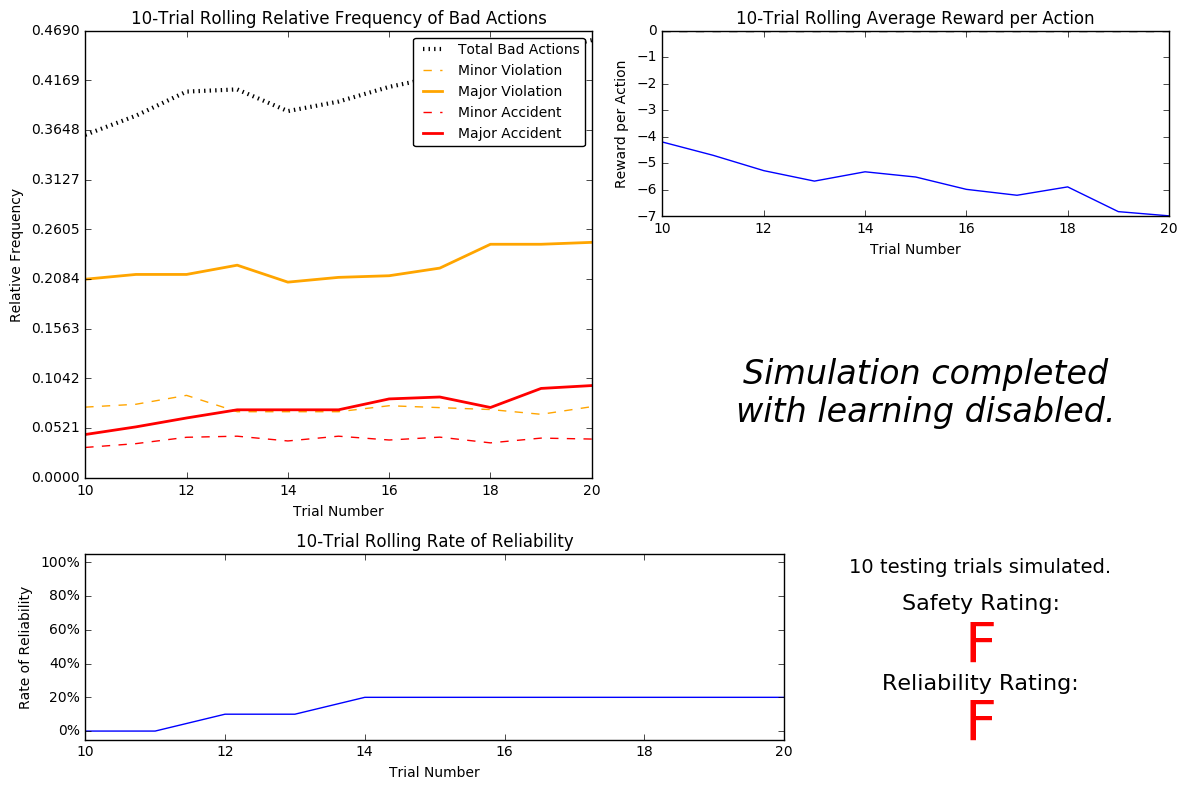

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** Given that the agent was driving completely randomly, it did surprisingly well in the first 10 trials. It only had ~36% bad decisions, ~4% minor accidents, and ~5% major accidents. From here these relative frequencies generally had the bad decisions going up to as much as ~46%. These of course depend on where the agent starts on the map, because if, for example, the agent was in a corner, it would tend not to take an action at all during an update, because the Environment's act method has an assertion that the agent takes a valid action. If it takes an invalid action, such as going a direction that doesn't exist, then it doesn't get graded for this. So, the numbers are quite a bit lower than what we would expect; i.e., that driving randomly would produce many major accidents and not a mere 5%. If we were to really dive into this code, it's likely that we could come up with a combinatorial theoretical expected frequency, but the scientific method is what is used here.

Given that an action will not actually be performed unless it's legal, no, the reliability doesn't make sense. What would really happen is that as soon as it caused a major accident it would be done and it would thus fail and maybe even kill any passengers. However, what the code does is it just penalizes the agent, but doesn't allow it to move. This is unrealistic and what we see is that the agent often does eventually get to the target location. Note also that the map is not very large and were the map larger than say walking distance, its reliability would plummet. Specifically in our tests it eventually got lucky and reached the target 20% of the time by the 20th trial (just moving randomly). What this does provide is a nice baseline for assessing how good our AI is once we go and implement it.

The net reward in each trial was always less than zero, so I think we could say that it was penalized heavily for bad actions. Also, since deadline was enforced, penalties got worse as it floundered around the map. The average reward per action for the first 10 trials was -4, which dropped to -7 by the 20th trial.

From the graphs, the outcome of the results changes significantly, but only looking at a window between 10 and 20 trials doesn't seem adequate. What we see is that in this window the bad decisions go up by 10%, the rewards per actions go down 3, and the reliability goes up 20%. Given that it's moving randomly, I really shouldn't be seeing a significant change in outcome, because it's not learning or actively doing anything differently. I should expect more dramatic results when the AI is improved.

The smartcab is unsafe and unreliable with an F rating in both. It is very unlikely to get you were you want to go and probably will kill or injure the passengers.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** Safety is not concerned with deadlines and waypoints. However, it is definitely concerned with the color of the light, and whether or not there are vehicles in its intended direction of movement.

However, efficiency should be concerned with all of these variables; however, for the current model, none of the input features are valuable here. Waypoint and deadline are pretty obvious. However, considering that the combinations that lead to left being an invalid action, simply following a waypoint is not always going to be the best solution. Also, the light color is incredibly important, because turning right on red is often allowed. To further prove my claim with real world evidence, check out this article about UPS: http://www.e-myth.com/cs/user/print/post/ups-makes-the-right-turn. Interestingly, if we just look at the combinatorics allowed under the driving rules system, this is patently obvious.

Edit based on Question 5: To make the state space feasible, we must drop 'deadline'. It's relevant, but it can't be used as a feature. There are other ways of enforcing 'deadline' than trying to learn it as a feature. It's also possible to drop 'right'. This is because we can only go left/forward on green. If we go right, then an agent to our right can't hit us. Thus, in a perfect world of smartcabs, 'right' isn't even relevant.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** 'waypoint'/'left'/'right'/'oncoming' = 3*4^3 {'forward','right','left',None} (with 'waypoint' not having a None state), assuming that the agent never needs to backtrack, which in reality is unrealistic, but for this problem it's fine. 'light' = 2 (red/green). 'deadline', as it's defined could be countably infinite by itself. So, the answer without doing any calculations is that the state space, without modification, is countably infinite. The agent absolutely couldn't learn how to decide a solution without modifying 'deadline' so that the state space isn't (3)(4^3)(2)(Inf). There are 384 states even if you ignore 'deadline'. Another issue is that where the waypoint should be depends on the lights, so it's like a circular dependency. For example, if a light just turned red, then you can't go left/straight for usually about 1min, but you could make three rights to go left. If you did that, you still wouldn't be where the waypoint wanted you to go, but you might actually be better off depending on how long it takes to do that. So, I think it's pretty unlikely that the agent could do a good job without using some heuristics. In fact, even A-star is pretty poor without heuristics [Artificial Intelligence for Games by Millington and Funge].

Also, I'm not really sure why it needs to learn to not go 'left'/'right'/'oncoming'. It should simply be hardcoded to follow the law -- no learning required. Also, learning to not break the law (red/yellow/green) doesn't require learning either, just communication of the law. Personally I'd make an abstract Law class that is regional and can be changed to represent the locale and then a client could simply put the law in for their region. The agent could generate an action, but if it violated the law, it would have to go to its next choice. This is more like a human, actually. A human doesn't need to crash 50 times to learn, they simply need to be told what the law is and then pass an exam on whether they memorized that law. Furthermore, there was no first human that needed to crash in order to figure out these laws. It was possible to deduce a rule system without ever actually crashing, using an arbitrary logic schema. A computer couldn't fail to pass the exam once it's been hardcoded, so they'd be much more reliable than a human. It's more like there is a legislator program which tries to generate the best driving laws. The legislator communicates those high level laws to the agents. Then those agents travel based on their own motivations towards some target, while adhering to the law, and the details of getting to that target within the constraints are what they've really learned. For humans, the penalty is breaking the law, and generally not the details. For computers, they really shouldn't be able to break the law in the first place and should only be concerned with the details.

But I digress, the purpose of this problem is to create an agent that learns these things. Now, assuming the edits made to Question 4, the state space is 'waypoint'/'left'/'oncoming'/'light' or (3)(4^2)(2) = 96. This is at least solvable. Whether or not it can be done in a reasonable amount of time has yet to be determined. Nevertheless, we cannot drop any of these features and expect to have both a good safety and efficiency. Also, the car doesn't 'really' need to crash to learn this; it simulates taking actions and then once these things are learned, then all other cars in production can simply have this knowledge downloaded onto their systems. No harm done. So, the point I made above is not that this technique doesn't work, but simply that it's not the way I would've done it. However, for the minutiae, I think reinforced learning is very logical. Also, in video games, where maybe you might want to try jumping down the pit or crashing just to see what happens, then I think it's an extremely good technique.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

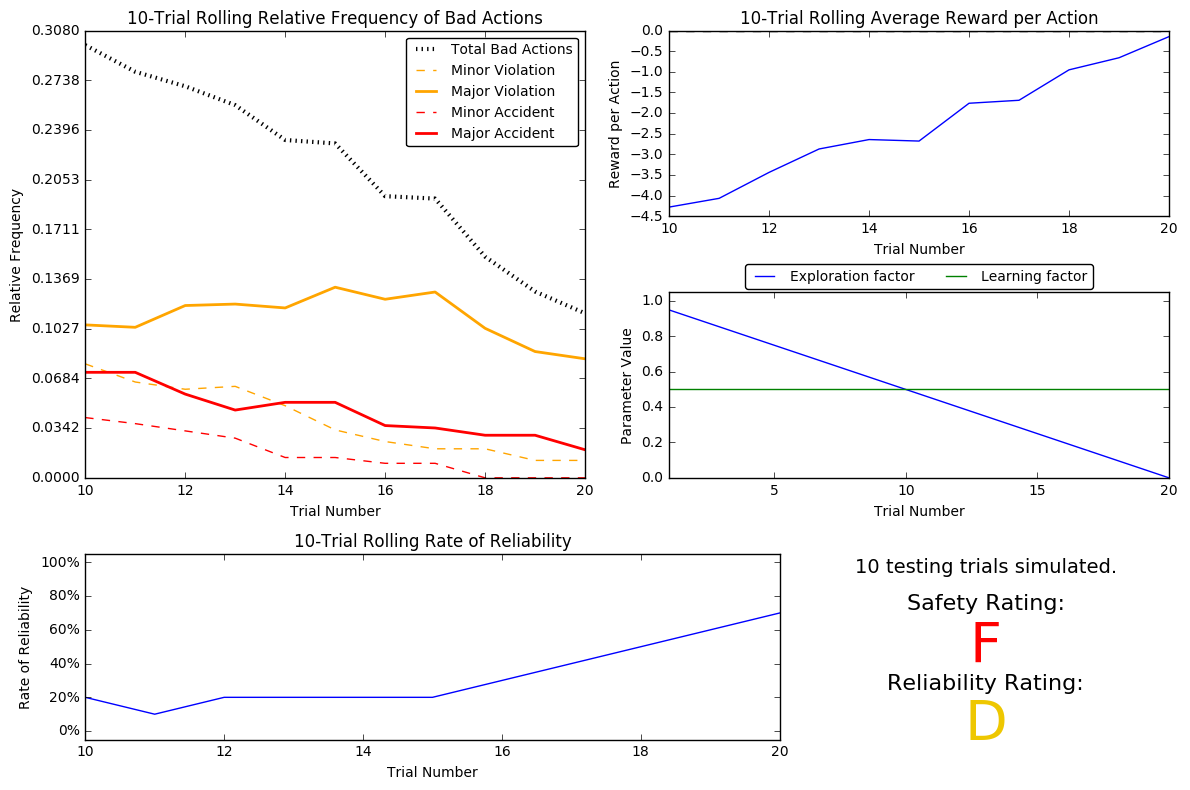

In [10]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** First, I want to address the issue of the state space. In the trials, only 81 out of 96 possible states were visited. This may be seen by looking in the sim_default-learning.txt file, which is the output of the final Q-table. Thus, the number of trials used was inadequate to properly train the agent.

That being said, there is little similar with the learning agent compared to the randomly moving agent. In other words, it's safer and more reliable, but overall it's safety and reliability are still inadequate.

The agent required exactly 20 trials before testing. As mentioned previously, this is inadequate for this agent. However, the reason for this is that the exploration factor diminished by a constant factor -0.05. Since epsilon started at 1, this means it takes 20 trials for it to go below the threshold of 0.01. Intuitively, the epsilon needs to be refined such that the algorithm continues to train the agent until it's actually ready for testing. Right now it's arbitrary.

The decaying function is accurately represented in the parameters panel. It's given by the line: f(t) = -0.05t + 1.

As the number of trials increased, the number of bad actions decreased steadily from about 0.3 to 0.1 from 10 to 20 trials. Also, the rewards increased from about -4 to 0 over that same interval. It is clear that with more training this agent would continue to improve.

The reliability rating is better, but the safety rating has not improved. For the most part, it's bad luck that the agent did so poorly in safety. However, the chance of the car encountering a situation that it didn't know what to do with is high. So, it's not surprising that it still had bad actions.

-----
## Improve the Q-Learning Driving Agent
The forth step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

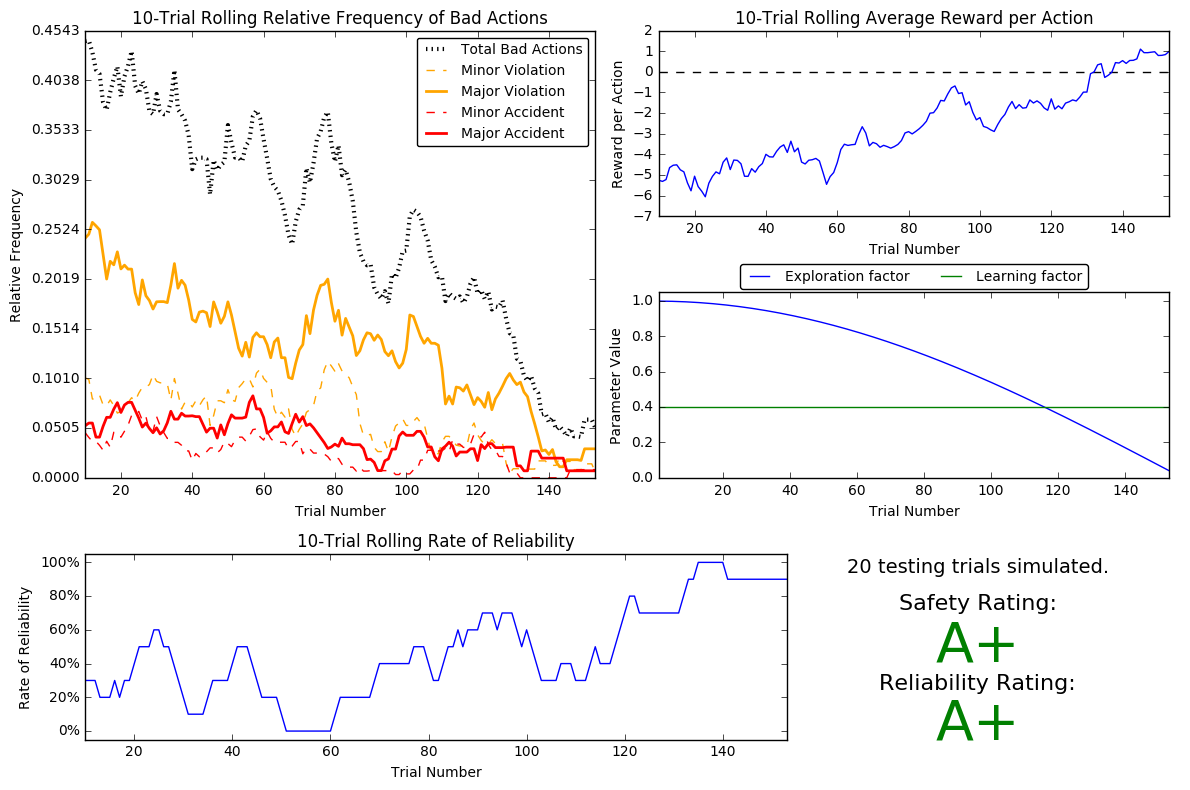

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** I used epsilon = cos(2pi + 0.01t) for my decaying function. I chose this because it stays random for a while and then near the tail of its quarter period it will start to really use the knowledge that it gained by driving randomly early on.

It takes 153 trials to train this agent.

I kept epsilon at 1.0, because there are many states and I wanted the agent to try to get itself into a lot of trouble early on. I chose alpha to be 0.4, because again there are many options and I didn't want the agent to try to learn too quickly.

This agent performed perfectly in safety and reliability in all 20 tests. There were no accidents at all and it got to the target location in time in every case. Note: there was still one state the agent didn't get itself into. However 95/96 is pretty close and it had a decent amount of trials. The previous learner only got F-D ratings, so obviously performing perfectly indicates that this setup is much better.

Yes, my Q-learner learned a successful driving policy. In many states it learned to dramatically favor one action above all others.

I am satisfied that my safety and reliability ratings are perfect. Do note that I increased the number of tests to 20 in order to further test its driving skills. It made no mistakes in any of the 20 tests and made it on time every time. I'm pretty happy about that! However, I think a little more training should be done just to make sure it at least has knowledge of all 96 states. I wouldn't want the agent to act completely randomly even in one state!

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** Below I provide a few examples of optimal/suboptimal policies. Also for clarity, note that my states are (waypoint, inputs['left'], inputs['oncoming'], inputs['light']).

('forward', None, 'forward', 'red')
- forward : -1.81
- right : 16.00
- None : 10.14
- left : -13.82

Note: I selected this policy because it ties into the UPS try to turn right policy, because it may hold even here. We strongly prefer not to drive forward or left through a red light. However, waiting or turning right would work out and oftentimes it's likely to be faster than just waiting, as well. Note 2: no one is to our left and oncoming is going straight, so it's 100% clear safety-wise. Specifically under this model, it is a suboptimal policy. The reason it is suboptimal is that the agent only has knowledge of the next waypoint and not the final target. Thus, it's impossible to know what is beyond the current state in this model. Therefore, doing nothing would be the ideal, but turning right has the greater value. Again, this is safe, it's just not possible to know if it's the most efficient, though it may well be.
 
('right', 'forward', 'left', 'red')
- forward : -15.66
- right : -7.99
- None : 2.30
- left : -15.58

Here is a contrasting situation that has a red light, where we actually want to go right, but it's unsafe to do so. Here we strongly prefer to wait. This is because if we have a red, the left has a green light, but left wants to go forward. Thus, we should yield to the traffic coming from the left and not get into a major accident.
 
('left', 'forward', 'right', 'green')
- forward : -0.15
- right : 0.89
- None : 0.00
- left : -7.86

Here we have a green light situation where we want to go left. However, oncoming traffic is trying to go right. They have the right of way, so going left is very bad even in this situation. So, hopefully by now it's extremely clear why going left should be avoided by waypoint planning algorithms. So, I think this makes UPS's claims of "always go right" a logical and empirical reality.

Note: The specific numbers above are from a different run where I only tested 10 trials, so they very likely do not match my current output exactly. Nevertheless, these are real data from an A+ reliability and safety test that I ran previously and the comments still hold.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** Mathematically it could work, just not within the current model. I'm basing this assessment mostly from https://en.wikipedia.org/wiki/Q-learning and Machine Learning by Tom Mitchell. The scenario is a nondeterministic Markov Decision Process, so given bounded rewards (which it has) and a 0<=gamma<1, it should converge, provided that each state-action pair is visited infinitely often, or realistically enough times to determine the proper course of action.

However, there is a practical reason why it will not work in this project. The reason is actually pretty obvious; it makes no sense for the agent to try to consider long-term rewards. The agent, as I define it, only considers lights and nearby traffic. In fact, I've shown that it's infeasible to even consider 'deadline' as a feature, since it introduces a countably infinite amount of features. Without deadline we're only considering the current state. Secondly, the environment itself is simply feeding the agent waypoints based on where our target is. The environment isn't learning what waypoints to give the agent. And most importantly, the agent doesn't know the final target; it only knows the next waypoint. Really, knowing a specific final target is a bit pointless, as well. A more interesting variable to keep track of would be a distance metric from the target. In this problem, it could be the Manhattan distance. Keeping track of this would be less of a feature and more of a means to improving the scoring. The reason for this is that it's necessary to keep track of a temporary gain in distance for the sake of overall decreasing the time to get to the final destination. A mathematical model should never fly in the face of practical reality. This practical reality is known to companies like UPS and a truly optimal learning algorithm should accurately portray this practical experience. However, this would actually put the cars capabilities beyond that of a human.

Again it is very possible to create a model such that this could work out. However, the model would need to be geared more towards getting to the target efficiently while maintaining safety. It is for this reason that I commented that it makes much more sense for these to be decoupled. Safety and efficiency are two diffirent things. As a human, I wouldn't consider them both simultaneously. What I'd do is try to learn an optimal path to the target while following the safety laws; i.e., take the optimal path if it's safe, otherwise take second choice, etc. Furthermore, this idea would not simply be concerned with the current state, but future states, as well. The current implementation is only truly optimal in terms of safety. In fact, it has been shown that there exist suboptimal solutions to the current model, even though those solutions are safe. The suboptimal solutions actually illustrate the flaw in the model itself. A truly optimal model may have more than one optimal solution to get to the target, but these would be known concretely.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.